In [5]:
!pip uninstall scikit_alarm_framework -y

Uninstalling scikit-alarm-framework-0.1:
  Successfully uninstalled scikit-alarm-framework-0.1


In [6]:
!pip install '../scikit_alarm_framework/'

Processing /home/rute/git/scikit_alarm_framework
  Running setup.py bdist_wheel for scikit-alarm-framework ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-7peskaet/wheels/b7/12/24/d0e64a37468db7d47ff4fc17aa96d9ef5de2db48828d0f16df
Successfully built scikit-alarm-framework


In [9]:
import numpy as np
import pandas as pd
import sys
import TransEntropy_mod as te
import k2_alg as k2

Requirement already up-to-date: pip in /home/rute/anaconda3/lib/python3.6/site-packages (18.1)


In [7]:
from scikit_alarm_framework.base

SyntaxError: invalid syntax (<ipython-input-7-59ec16d4c9fb>, line 1)

In [ ]:
#recycle flow - xmeas05
#reactor feed rate - xmeas06
#reactor pressure - xmeas07
#reactor_level - xmeasmeas08
#reactor temperature - xmeas09
#product seprator level - xmeas12
#compressor work - xmeas20
#reactor cooling water outlet temperature - xmeas21

In [10]:
dist8_proc = pd.read_csv("resultados_defesa/dist8_proc.csv")
dist8_proc_sv = dist8_proc[['XMEAS' + var for var in ['05','06','07','08', '09', '12', '20', '21']]]

In [11]:
thresh_high = [33,48.3,2804,66,122.93,52.2,274,102.55]
thresh_low = [31,46,2789,62.5,122.7,45,268,102.25]


In [19]:
high_alarms = dist8_proc_sv.gt(thresh_high).astype('int')
low_alarms = dist8_proc_sv.gt(thresh_low).astype('int')

In [13]:
high_alarms = set_point.generate(dist8_proc_sv, thresh_high)
low_alarms = set_point.generate(dist8_proc_sv, thresh_low)

NameError: name 'set_point' is not defined

In [20]:
new_high_names = ['x' + str(var) + '_high' for var in np.arange(1,9)]
new_low_names =   ['x' + str(var) + '_low' for var in np.arange(1,9)]


rename_high = {key:value for key, value in zip(high_alarms.columns,new_high_names)}
rename_low = {key:value for key, value in zip(low_alarms.columns,new_low_names)}

high_alarms = high_alarms.rename(rename_high, axis='columns')
low_alarms = low_alarms.rename(rename_low, axis='columns')


In [23]:
alarms_df = pd.concat([high_alarms, low_alarms], axis=1)
alarms_df.to_csv("resultados_defesa/alarms.csv")

In [24]:
alarms_m5 = te.apply_roll_mean(alarms_df, 5)
alarms_m5.to_csv('resultados_defesa/df_i3e_m5.csv')

In [28]:
alarms_m5.head()

,x1_high,x2_high,x3_high,x4_high,x5_high,x6_high,x7_high,x8_high,x1_low,x2_low,x3_low,x4_low,x5_low,x6_low,x7_low,x8_low
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#te_i3e_df = te.transferEntropy_case(alarms_df, 50,1,1) #without moving mean

In [25]:
len(alarms_m5)

69997

In [26]:
 te_i3e_m5 = te.transferEntropy_case(alarms_m5, 50,1,1)

In [29]:
t = np.mean(te_i3e_m5[0]) + 3*np.std(te_i3e_m5[0])
df_te_i3e = pd.DataFrame(data= te_i3e_m5[0], columns= alarms_m5.columns, index = alarms_m5.columns)
df_te_i3e_lag = pd.DataFrame(data= te_i3e_m5[1], columns= alarms_m5.columns, index = alarms_m5.columns)
df_te_i3e.to_csv('resultados_defesa/te_i3e_m5.csv')
df_te_i3e_lag.to_csv('resultados_defesa/te_i3e_m5_lags.csv')

In [ ]:
te_i3e_ltd = te.generate_df_valid_corrs(df_te_i3e, t)
te_i3e_ac = te.generate_aciclic_graph(te_i3e_ltd.as_matrix())


df_te_i3e_ac = pd.DataFrame(data= te_i3e_ac, columns= cols_rename, index = cols_rename)
df_te_i3e_ac.to_csv('resultados_defesa/te_i3e_ac.csv')

In [ ]:
te.graph_simple(df_te_i3e_ac)

In [ ]:
df_lags_final  = df_te_i3e_lag[df_te_i3e_ac > 0].fillna(0)
df_lags_final.to_csv('resultados_defesa/df_lags_i3e_ltd.csv')

In [10]:
#test k2
df_m5 = pd.read_csv("resultados_defesa/df_i3e_m5.csv", index_col=0)
df_lags_final = pd.read_csv("resultados_defesa/df_lags_i3e_ltd.csv", index_col=0)

dict_lags = te.get_all_shifts(df_lags_final.columns, df_lags_final.copy())
k2_te_tree = te.gen_tree_from_lags(dict_lags)

In [32]:
k2_te_tree

{'x1_high': ['x3_high-0_0',
  'x3_high-1_0',
  'x3_high-2_0',
  'x3_high-3_0',
  'x3_high-4_0',
  'x3_high-5_0',
  'x7_high-0_0',
  'x8_high-0_0',
  'x8_high-1_0',
  'x8_high-2_0',
  'x7_low-0_0'],
 'x3_high-0_0': [],
 'x3_high-1_0': [],
 'x3_high-2_0': [],
 'x3_high-3_0': [],
 'x3_high-4_0': [],
 'x3_high-5_0': [],
 'x7_high-0_0': [],
 'x8_high-0_0': [],
 'x8_high-1_0': [],
 'x8_high-2_0': [],
 'x7_low-0_0': [],
 'x2_high': ['x1_high-0_0',
  'x1_high-1_0',
  'x1_high-2_0',
  'x1_high-3_0',
  'x1_high-4_0',
  'x1_high-5_0',
  'x1_high-6_0',
  'x1_high-7_0',
  'x1_high-8_0',
  'x1_high-9_0',
  'x1_high-10_0',
  'x1_high-11_0',
  'x1_high-12_0',
  'x1_high-13_0',
  'x1_high-14_0',
  'x1_high-15_0',
  'x1_high-16_0',
  'x1_high-17_0',
  'x1_high-18_0',
  'x1_high-19_0',
  'x1_high-20_0',
  'x1_high-21_0',
  'x1_high-22_0',
  'x1_high-23_0',
  'x1_high-24_0',
  'x1_high-25_0',
  'x1_high-26_0',
  'x1_high-27_0',
  'x1_high-28_0',
  'x1_high-29_0',
  'x1_high-30_0',
  'x1_high-31_0',
  'x1_

In [12]:
k2_result = k2.k2(df_m5, k2_te_tree, df_lags_final, 0.7)

here  x7_high x1_high
here  x1_high x2_high
here  x8_high x1_low
here  x8_high x7_low


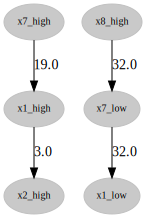

In [13]:
clean_df = k2.gen_clean_df(df_lags_final, k2_result)
df_path  = df_lags_final[clean_df>0].fillna(0)

k2.graph_simple(df_path)

In [31]:
##reading saved data
df_te_m5 = pd.read_csv("resultados_defesa/te_i3e_m5.csv", index_col=0)
df_te_m5_ac = pd.DataFrame(data = te.generate_aciclic_graph(df_te_m5.as_matrix()),columns= alarms_df.columns, index = alarms_df.columns)


/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rute/git/pesquisa/TransEntropy_mod.py:415: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(np.unique(lista[node]) == ['x']):
